# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


In [1]:
from google.colab import files
uploaded = files.upload()

Saving img1.jpg to img1.jpg
Saving img2.jpg to img2.jpg
Saving img3.jpg to img3.jpg
Saving img4.jpg to img4.jpg


Import some prerequisites:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
from google.colab.patches import cv2_imshow

Run this cell for plotting.

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [4]:
def erode(image,kernel):
    w,h= image.shape 
    cnt= 1
    eroded= np.zeros((w,h), dtype=np.uint8)
    for i in range(cnt, w-cnt):
        for j in range(cnt,h-cnt):
            temp= image[i-cnt:i+cnt+1, j-cnt:j+cnt+1]
            conv= temp*kernel
            min = 255
            for x in range (kernel.shape[0]):
                for y in range (kernel.shape[1]):
                    if kernel[x,y] !=0:
                        if conv[x,y] < min:
                            min = conv[x,y]
            eroded[i,j]= min

    return eroded


def dilate(image,kernel):
    w,h= image.shape 
    cnt= 1
    res= np.zeros((w,h), dtype=np.uint8)
    for i in range(cnt, w-cnt):
        for j in range(cnt,h-cnt):
            temp= image[i-cnt:i+cnt+1, j-cnt:j+cnt+1]
            conv= temp*kernel
            max = 0
            for x in range (kernel.shape[0]):
                for y in range (kernel.shape[1]):
                    if kernel[x,y] !=0:
                        if conv[x,y] > max:
                            max = conv[x,y]
            res[i,j]= max

    return res

Implement this function to get the input image and return the skeleton of the input image.

In [11]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy()
    params = None
    
    #Write your code here
    _, image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

    res = np.zeros(image.shape, np.uint8)
    kernel = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype=np.uint8)

    i=0
    while cv2.countNonZero(image)!=0:
      i = i+1
      eroded = erode(image, kernel)
      open_ = dilate(eroded, kernel)
      res = cv2.bitwise_or(res, cv2.subtract(image, open_))
      image = eroded
        
    res = cv2.bitwise_not(res)

    params=[kernel,i]
    
    
    return res, params

Test your implementation (don't change this cell).

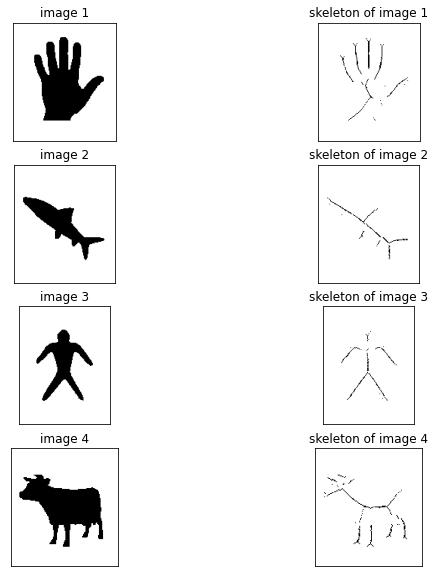

In [12]:
image_list = []

image1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [15]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()

    
    
    #Write your code here
    not_ = cv2.bitwise_not(res)   
    
    for i in range (0,params[1]):
      open_ = cv2.dilate(not_, params[0])
      res = cv2.bitwise_or(not_, cv2.add(not_, open_))
      image=res
    
    
    return res

Test your implementation (don't change this cell).

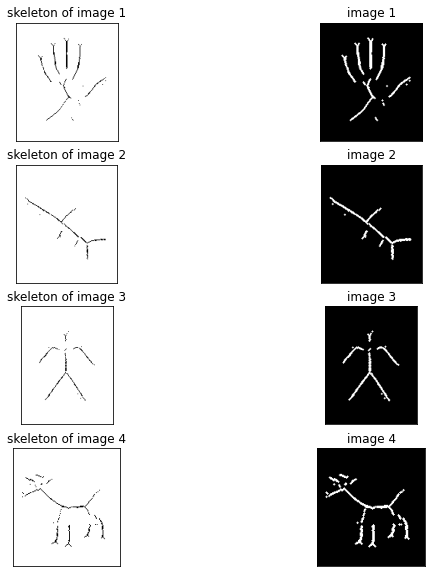

In [16]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

Implement this function to detect shapes and number of cars in an input image.

In [ ]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = 0
    
    #Write your code here

    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 

    thresh = cv2.threshold(closing, 100, 255, cv2.THRESH_BINARY)[1]
    cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1:]
    
    for c in cnts:

        c = c.astype("float")
        c = c.astype("int")
        cv2.drawContours(result, [c], -1, (0, 255, 255), 2)
        cars_num=cars_num+1

    
    return result,cars_num

Test your implementation (don't change this cell).

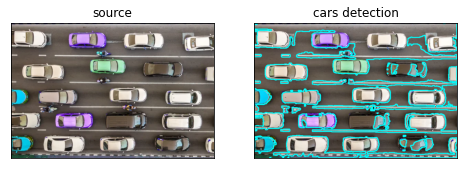

In [ ]:
image_list = []
image = cv2.imread('img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [ ]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = 0
    
    #Write your code here

    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 

    thresh = cv2.threshold(closing, 100, 255, cv2.THRESH_BINARY)[1]
    cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1:]
    
    for c in cnts:
       
        M = cv2.moments(c)
        cX = int((M["m10"] / M["m00"]))
        cY = int((M["m01"] / M["m00"]))
        c = c.astype("float")
        c = c.astype("int")
        cv2.drawContours(result, [c], -1, (0, 255, 255), 2)
        flowers_num=flowers_num+1
    
    return result,flowers_num

Test your implementation (don't change this cell).

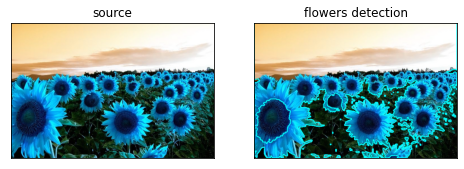

In [ ]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!